## KAGGLE PROJECT:
This project focuses on predicting customer churn for a bank using machine learning. The goal is to identify which customers are likely to leave based on their profile and account activity. We began by cleaning and preparing the data removing duplicates, handling categorical variables, and scaling numerical features. We then explored the data for patterns and outliers before training a logistic regression model. After evaluating the model's performance on a validation set, we used it to predict the likelihood of churn in unseen data, helping the bank proactively address customer retention.

In [54]:
import pandas as pd #DATA LOADING

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

print(train.head()) #displaying the test and train data
print(train.tail())

   id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4 

In [55]:
print(test.head())
print(test.tail())

       id  CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0  165034    15773898   Lucchese          586    France  Female  23.0       2   
1  165035    15782418       Nott          683    France  Female  46.0       2   
2  165036    15807120         K?          656    France  Female  34.0       7   
3  165037    15808905  O'Donnell          681    France    Male  36.0       8   
4  165038    15607314    Higgins          752   Germany    Male  38.0      10   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0       0.00              2        0.0             1.0        160976.75  
1       0.00              1        1.0             0.0         72549.27  
2       0.00              2        1.0             0.0        138882.09  
3       0.00              1        1.0             0.0        113931.57  
4  121263.62              1        1.0             0.0        139431.00  
            id  CustomerId   Surname  CreditScore Geography  Gender  

In [56]:
print(test.info()) # showing the number of entries/columns/ and any missing values
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   

In [57]:
#checking again for null values:
train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [58]:
test.isnull().sum() #no null data

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

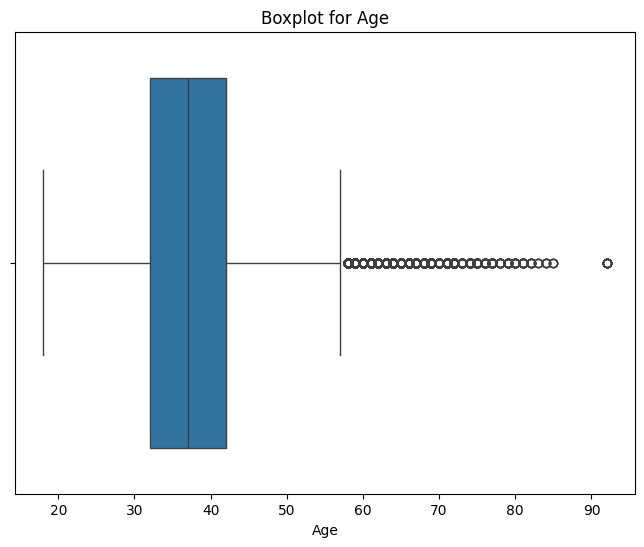

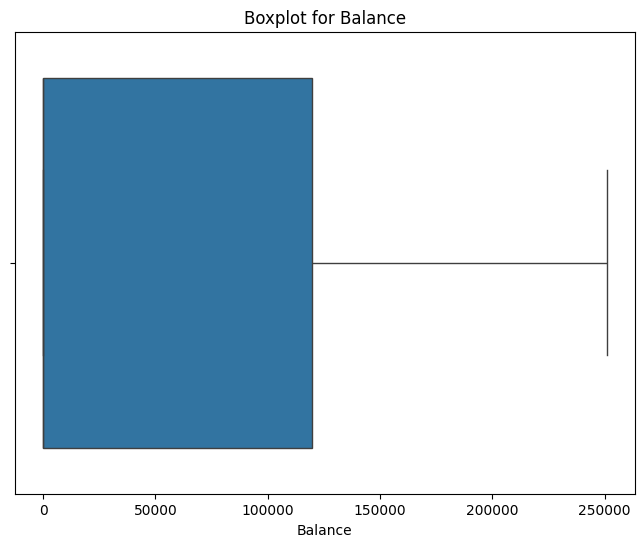

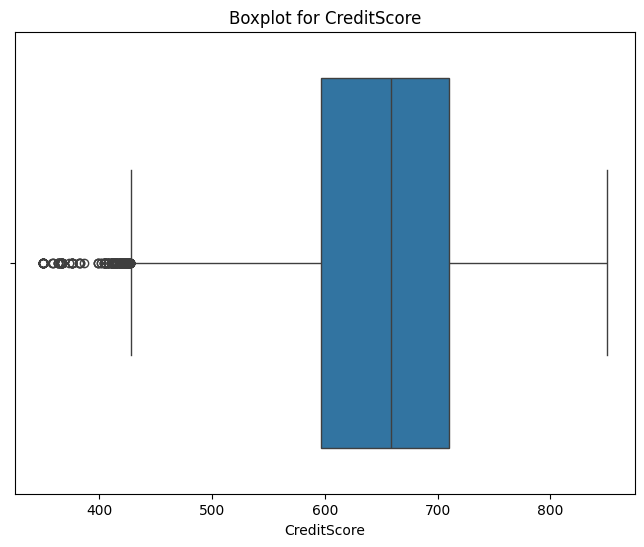

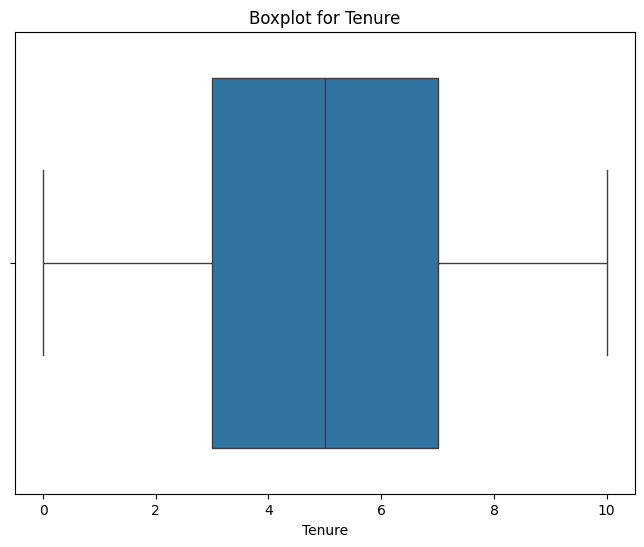

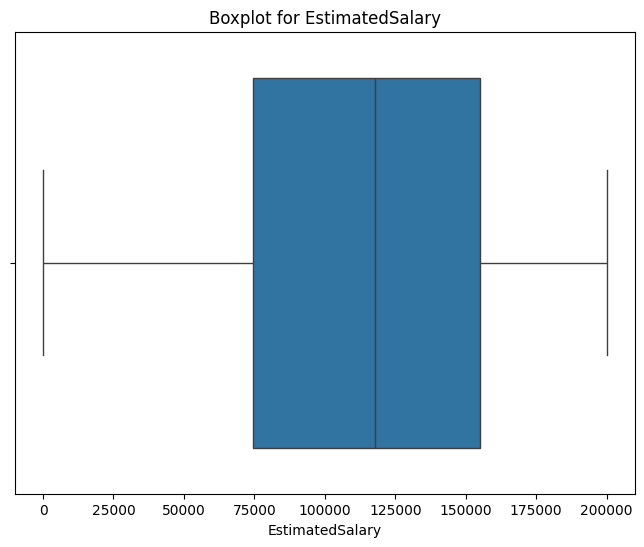

In [59]:
#boxplot for outliers
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to plot
features = ['Age', 'Balance', 'CreditScore', 'Tenure', 'EstimatedSalary']

# Plot boxplots for each feature
for col in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=train, x=col)
    plt.title(f'Boxplot for {col}')
    plt.show()


In [60]:
#Target: how many exited and how many churned
#Classification: 0 = churned 1 = stayed

#showing the proportion of customers who stayed and left
train['Exited'].value_counts(normalize=True)

Exited
0    0.788401
1    0.211599
Name: proportion, dtype: float64

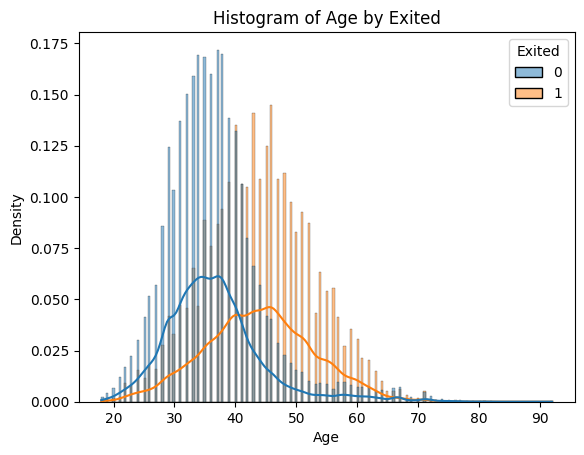

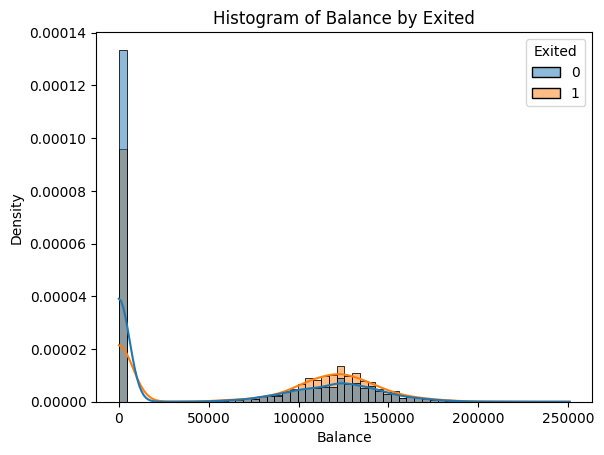

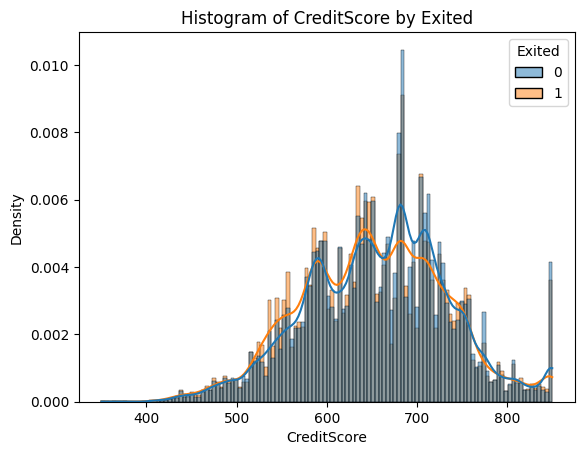

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
# histogram for age, balance, and creditscore split by exited
for col in ['Age', 'Balance', 'CreditScore']:
    sns.histplot(data=train, x=col, hue='Exited', kde=True, stat="density", common_norm=False)
    plt.title(f'Histogram of {col} by Exited')
    plt.show()


In [62]:
#churn rates vs geography
pd.crosstab(train['Geography'], train['Exited'], normalize='index')

Exited,0,1
Geography,,
France,0.834718,0.165282
Germany,0.621048,0.378952
Spain,0.827824,0.172176


In [63]:
#removing duplicate customer recorde based on customer ID
train = train.drop_duplicates(subset="CustomerId", keep="first")
test = test.drop_duplicates(subset="CustomerId", keep="first")

from sklearn.preprocessing import StandardScaler

#applying standardization mean=0, std=1 to the numeric features 
scaler = StandardScaler()

# features to scale
numeric_features = ['Age', 'Tenure', 'Balance', 'CreditScore', 'EstimatedSalary']

train[numeric_features] = scaler.fit_transform(train[numeric_features])
test[numeric_features] = scaler.transform(test[numeric_features])


In [64]:
# converting categorical colms to binary variables(excluding first category)
train = pd.get_dummies(train, columns=['Geography', 'Gender'], drop_first=True)
test = pd.get_dummies(test, columns=['Geography', 'Gender'], drop_first=True)


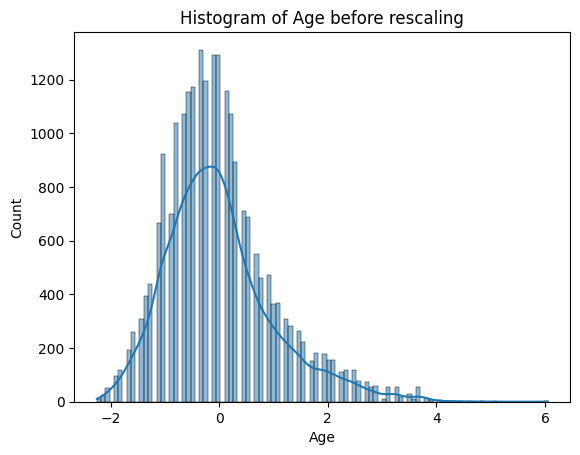

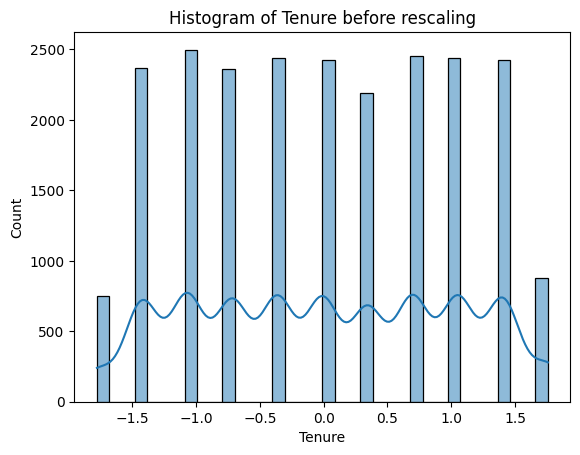

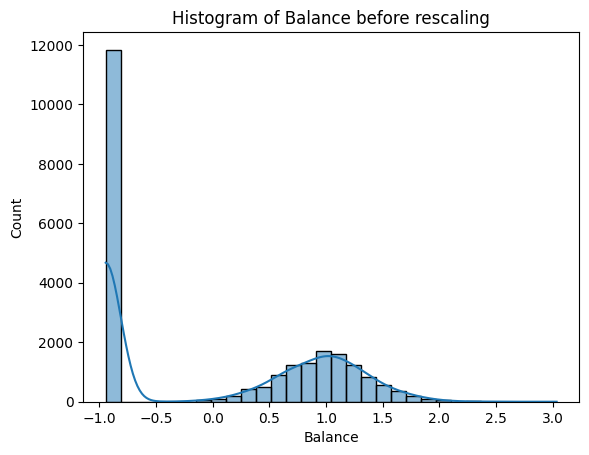

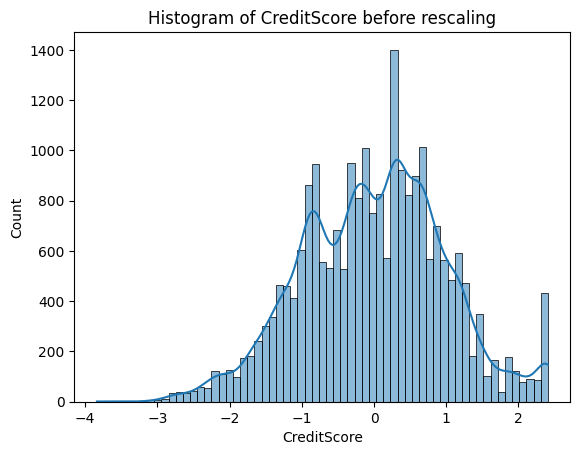

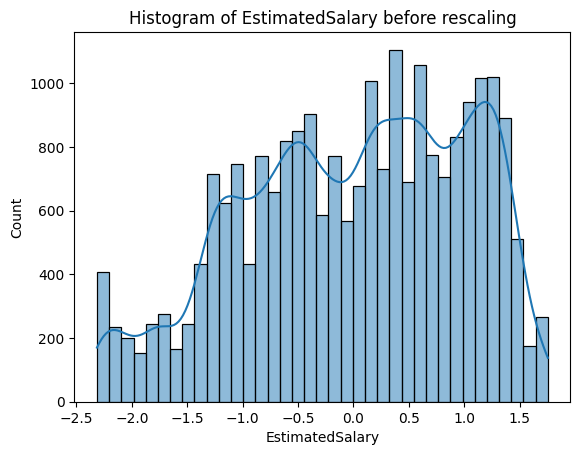

In [65]:
# plot histograms for numeric features before scaling
for col in ['Age', 'Tenure', 'Balance', 'CreditScore', 'EstimatedSalary']:
    sns.histplot(data=train, x=col, kde=True)
    plt.title(f'Histogram of {col} before rescaling')
    plt.show()

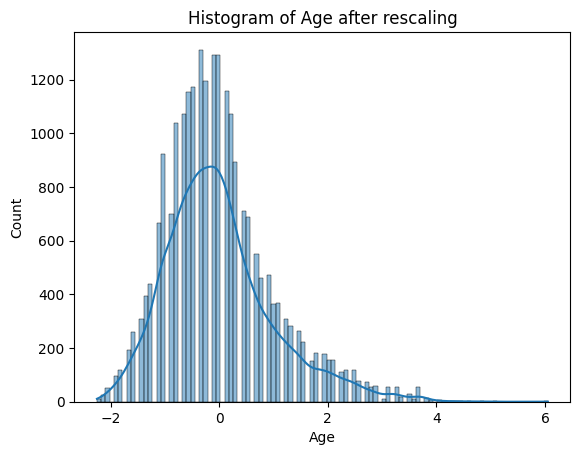

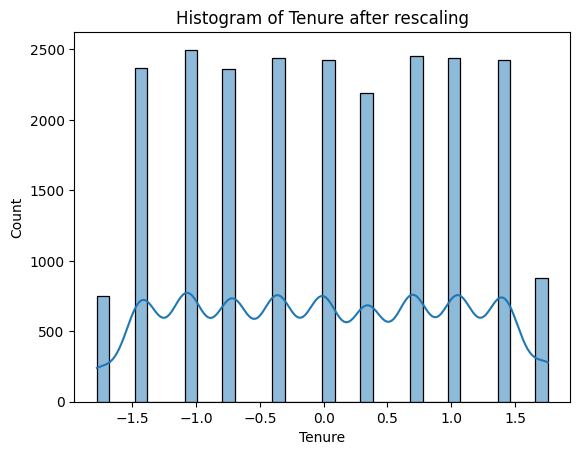

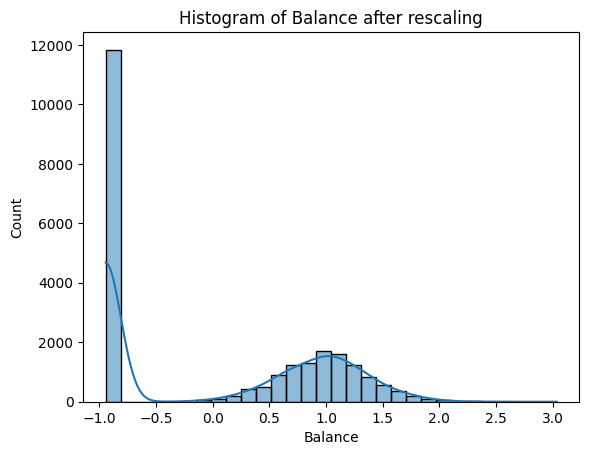

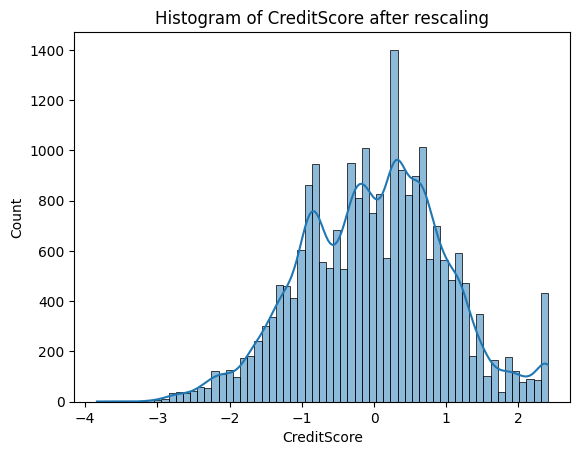

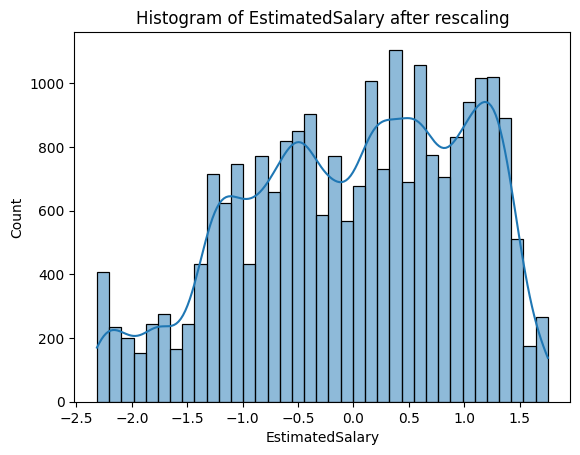

In [66]:
# plot histograms for numeric features after scaling
for col in ['Age', 'Tenure', 'Balance', 'CreditScore', 'EstimatedSalary']:
    sns.histplot(data=train, x=col, kde=True)
    plt.title(f'Histogram of {col} after rescaling')
    plt.show()


In [67]:
#machine learning

# checking the columns after one-hot encoding
print(train.columns)
print(test.columns)

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male'],
      dtype='object')
Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male'],
      dtype='object')


In [68]:
# dropping only existing columns
columns_to_drop = ['id', 'Surname', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']
train = train.drop(columns=[col for col in columns_to_drop if col in train.columns])
test = test.drop(columns=[col for col in columns_to_drop if col in test.columns])

In [69]:
from sklearn.model_selection import train_test_split

# separate features and target for the training set
X = train.drop(columns=['Exited'])
y = train['Exited']

# split data into training (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# prepare test data (no target column in the test set)
X_test = test.drop(columns=['Exited'], errors='ignore')  # If 'Exited' is in test, drop it


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score

# rescale features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# evaluate on the validation set
y_val_pred = model.predict(X_val_scaled)
y_val_prob = model.predict_proba(X_val_scaled)[:, 1]

# calculate performance metrics
accuracy = accuracy_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_prob)

print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Validation ROC AUC: {roc_auc:.4f}')


Validation Accuracy: 0.8185
Validation ROC AUC: 0.7959


In [71]:
# predict on the test set
y_test_prob = model.predict_proba(X_test_scaled)[:, 1]
print(y_test_prob)

[0.01522342 0.47887259 0.11128162 ... 0.71499926 0.35653661 0.06342585]
